In [2]:
#importing python libraries
import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy
import numpy as np

In [3]:
#import dat files 
bus_cat = pd.read_csv('business_category.dat', sep='\t', skiprows=0, header=None)
bus_cit = pd.read_csv('business_city.dat', sep='\t', skiprows=0, header=None)
us_bus = pd.read_csv('user_business.dat', sep='\t', skiprows=0, header=None)
us_com = pd.read_csv('user_compliment.dat', sep='\t', skiprows=0, header=None)
us_us = pd.read_csv('user_user.dat', sep='\t', skiprows=0, header=None)

In [4]:
#cleaning data
bus_cat = bus_cat.drop(2,axis=1)
bus_cit = bus_cit.drop(2,axis=1)
us_com = us_com.drop(2,axis=1)
us_us = us_us.drop(2,axis=1)

In [5]:

bus_cat.columns = ['Business','Category']
bus_cit.columns = ['Business', 'City']
us_com.columns = ['User','Compliment']
us_us.columns = ['User','Users'] #in user-user, i am assigning the first column User and second column Users
us_bus.columns = ['User','Business','Rating']

In [6]:
#adding keys in the front
us_bus['User'] = us_bus['User'].astype(str)
us_bus['Business'] = 'b' + us_bus['Business'].astype(str)
us_bus['Rating'] = 'r' + us_bus['Rating'].astype(str)

In [7]:
us_bus

,User,Business,Rating
0,1,b8391,r5
1,1,b8971,r5
2,2,b186,r5
3,2,b205,r5
4,2,b209,r4
...,...,...,...
198392,16238,b13256,r5
198393,16239,b2580,r4
198394,16239,b10525,r1
198395,16239,b12714,r4


In [153]:
bus_cat['Business'] = 'b' + bus_cat['Business'].astype(str)
bus_cat['Category'] = 'ca' + bus_cat['Category'].astype(str)

In [154]:
bus_cit['Business'] = 'b' + bus_cit['Business'].astype(str)
bus_cit['City'] = 'ci' + bus_cit['City'].astype(str)

In [155]:
us_com['User'] = us_com['User'].astype(str)
us_com['Compliment'] = 'co' + us_com['Compliment'].astype(str)

In [156]:
us_us['User'] = us_us['User'].astype(str)
us_us['Users'] = us_us['Users'].astype(str) #Assigning u to Users #change

In [157]:
#making the graph
G1 = nx.Graph()

G1 = nx.from_pandas_edgelist(us_bus.head(10), 'User', 'Business', edge_attr=['Rating'])
G2 = nx.from_pandas_edgelist(us_com.head(10), 'User', 'Compliment')
G3 = nx.from_pandas_edgelist(us_us.head(10), 'User', 'Users')
G4 = nx.from_pandas_edgelist(bus_cat.head(10), 'Business','Category')
G5 = nx.from_pandas_edgelist(bus_cit.head(10), 'Business','City')

G1.add_edges_from(G2.edges)
G1.add_edges_from(G3.edges)
G1.add_edges_from(G4.edges)
G1.add_edges_from(G5.edges)

In [158]:
##adding rating edges

colors=[]
for node in G1:
    if node in us_bus['User'].values:
        colors.append('red')
    elif node in us_bus['Business'].values:
        colors.append('olive')
    elif node in us_com['Compliment'].values:
        colors.append('yellow')
    elif node in bus_cit['City'].values:
        colors.append('orange')
    elif node in us_us['Users'].values:
        colors.append('blue')
    else:
        colors.append('green')

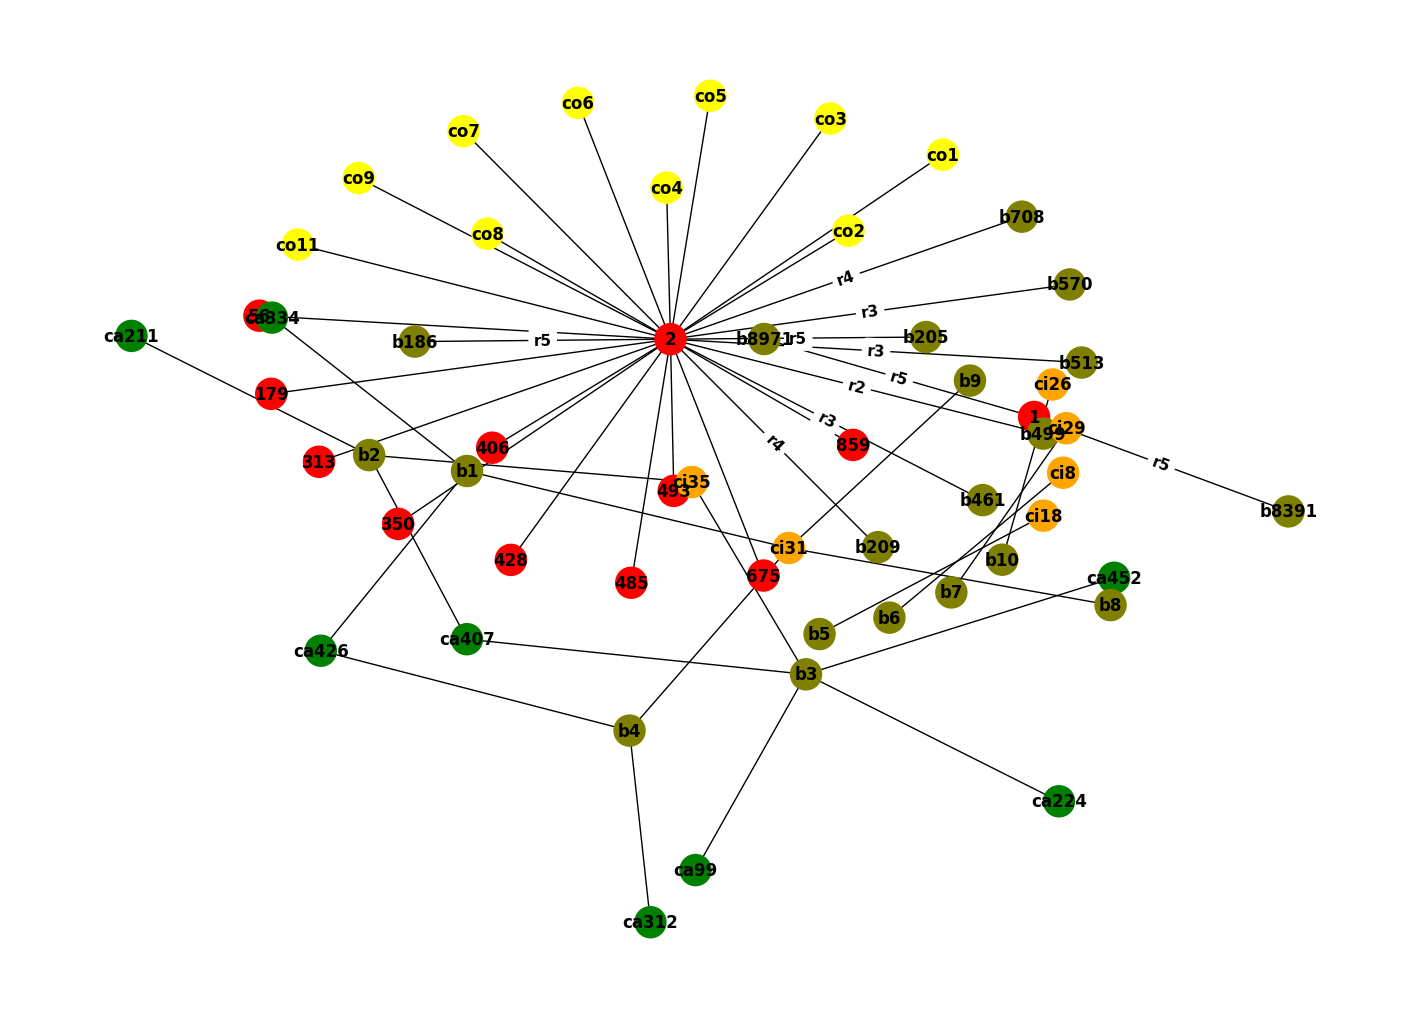

In [159]:
plt.figure(figsize=(14,10))

pos = nx.kamada_kawai_layout(G1)

nx.draw(G1, pos, node_color=colors, font_weight = 'bold', with_labels=True,node_size=500)
edge_labels = nx.get_edge_attributes(G1,'Rating')
nx.draw_networkx_edge_labels(G1, pos, edge_labels = edge_labels, font_size=11, font_weight='bold')

plt.show()